### COMPLEMENTARY PYTHON SCRIPTS TO THE AZURE ML STUDIO EXPERIMENT "PREDICTING WORLD POVERTY"

## Main packages import

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Upload 'csv' file into dataframe 'frame'

In [2]:
frame = pd.read_csv('MPPDSCap_Jul2019_1.csv')
frame.info()
frame.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 56 columns):
row_id                                   12600 non-null int64
country                                  12600 non-null object
is_urban                                 12600 non-null bool
age                                      12600 non-null int64
female                                   12600 non-null bool
married                                  12600 non-null bool
religion                                 12600 non-null object
relationship_to_hh_head                  12600 non-null object
education_level                          12600 non-null int64
literacy                                 12600 non-null bool
can_add                                  12600 non-null bool
can_divide                               12600 non-null bool
can_calc_percents                        12600 non-null bool
can_calc_compounding                     12600 non-null bool
employed_last_year          

,row_id,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,...,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability
0,0,C,False,18,True,True,P,Other,1,True,...,True,True,False,False,False,False,1,0,1,0.515
1,1,C,True,30,True,True,P,Other,1,True,...,True,True,False,False,False,False,1,0,0,0.981
2,2,A,False,20,True,True,Q,Spouse,1,True,...,False,False,False,False,False,False,0,0,0,0.982
3,3,A,False,61,False,True,Q,Head,0,False,...,False,False,False,False,False,False,0,0,0,0.879
4,4,D,False,26,True,True,X,Spouse,1,True,...,False,False,False,False,False,False,1,0,3,0.796


### Feature Engineering/Processing

##### (Script used with the "Python Script" module of the Az ML Studio experiment)

In [ ]:
    # REPLACING VALUES 1 - Convert all "boolean" columns to binary
    index_bool_col = dataframe1.select_dtypes(include=['bool']).columns
    dataframe1[index_bool_col] = dataframe1[index_bool_col].astype('int')
    
    # REPLACING VALUES 2 - Single Values
    dataframe1['education_level'] = dataframe1['education_level'].replace(-1, 0)
    dataframe1['employment_type_last_year'] = dataframe1['employment_type_last_year'].replace('other', 'irregular_seasonal')
    dataframe1['num_shocks_last_year'] = dataframe1['num_shocks_last_year'].replace({4 : 3, 5 : 3})
    
    # REPLACING VALUES 3 - Range of Values
    # Get array with the unique values from 'avg_shock_strength_last_year' column
    unique_val = np.sort(dataframe1['avg_shock_strength_last_year'].unique())                                  
    # Generate loop to replace values
    for x in unique_val :                                                                         
        if x > 1.0 and x <= 1.5 :
            dataframe1['avg_shock_strength_last_year'] = dataframe1['avg_shock_strength_last_year'].replace(x, 1.0)
        elif x > 1.5 and x <= 2.5 :
            dataframe1['avg_shock_strength_last_year'] = dataframe1['avg_shock_strength_last_year'].replace(x, 2.0)
        elif x > 2.5 and x <= 3.5 :
            dataframe1['avg_shock_strength_last_year'] = dataframe1['avg_shock_strength_last_year'].replace(x, 3.0)
        elif x > 3.5 and x <= 4.5 :
            dataframe1['avg_shock_strength_last_year'] = dataframe1['avg_shock_strength_last_year'].replace(x, 4.0)
        elif x > 4.5 and x <= 5.0 :
            dataframe1['avg_shock_strength_last_year'] = dataframe1['avg_shock_strength_last_year'].replace(x, 5.0)

### Apply visualization

#### Numeric Features

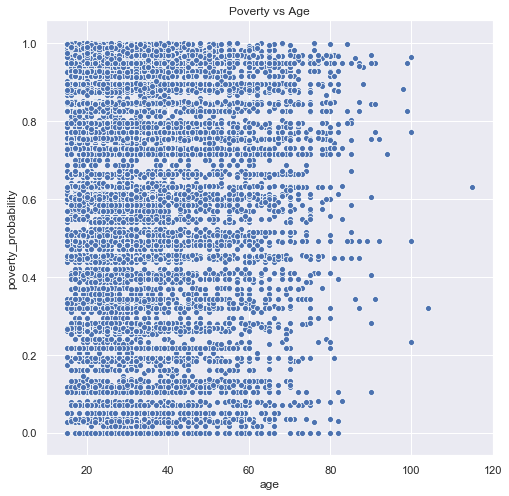

In [12]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,8))
axscatterplot = sns.scatterplot(x='age', y='poverty_probability', data=frame)
plt.title("Poverty vs Age")
plt.show()

#### Categorical Features

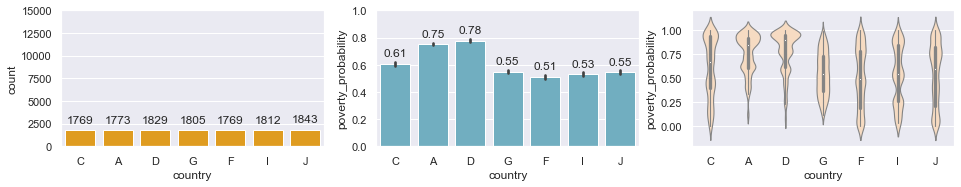

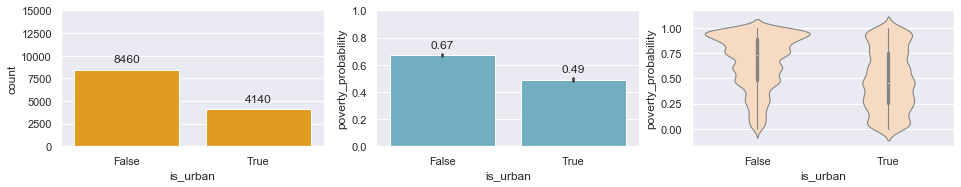

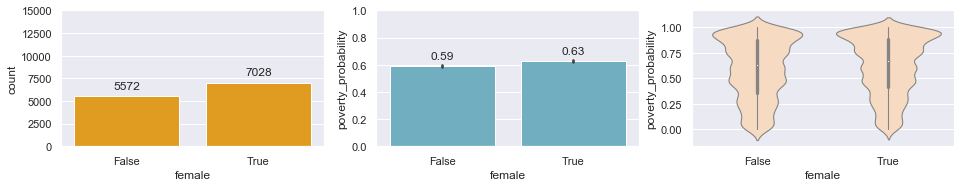

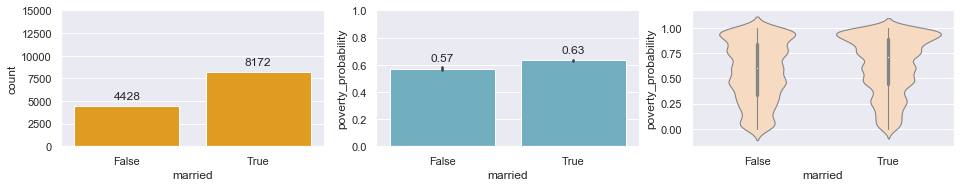

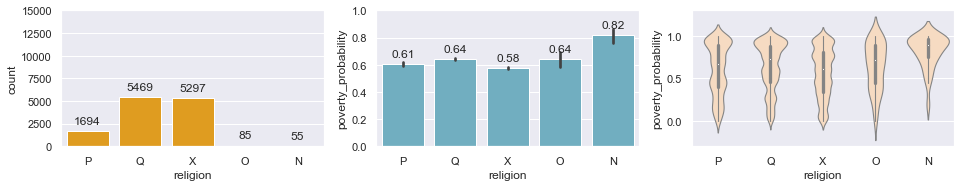

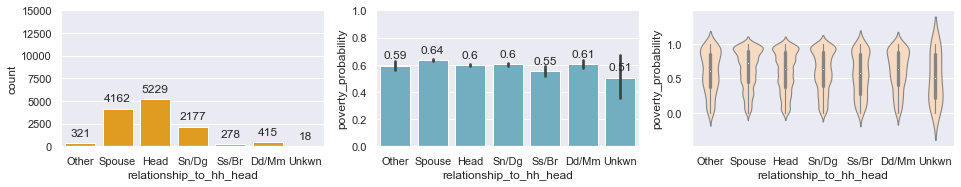

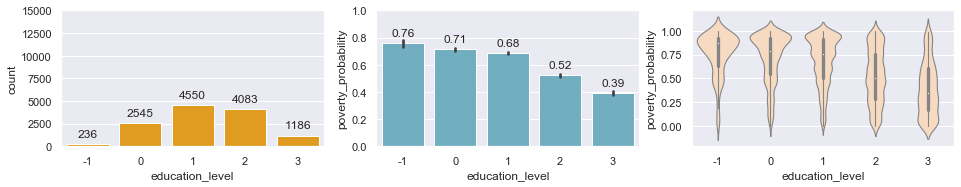

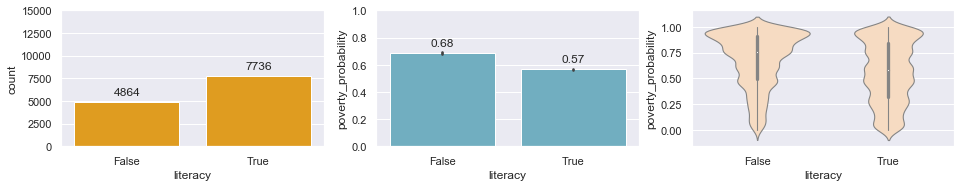

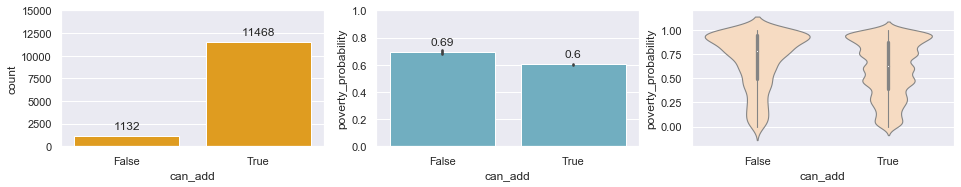

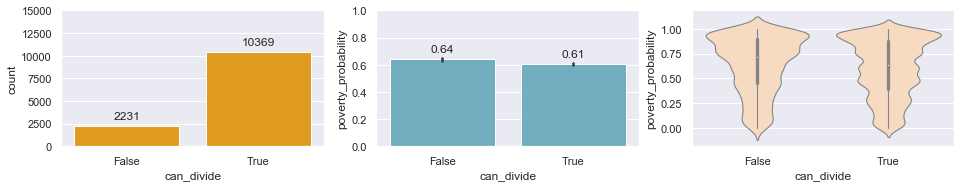

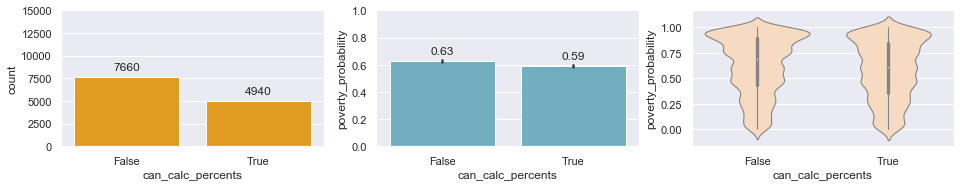

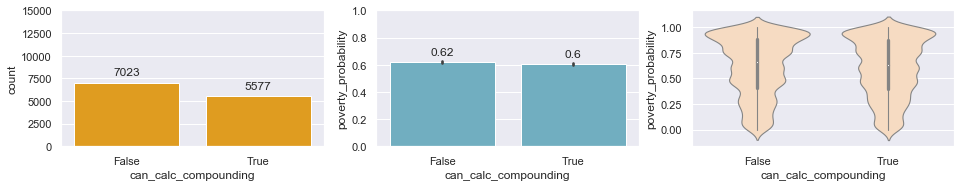

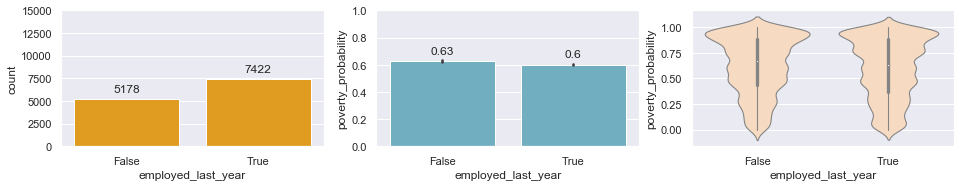

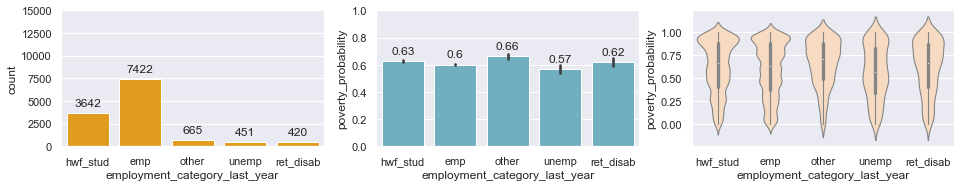

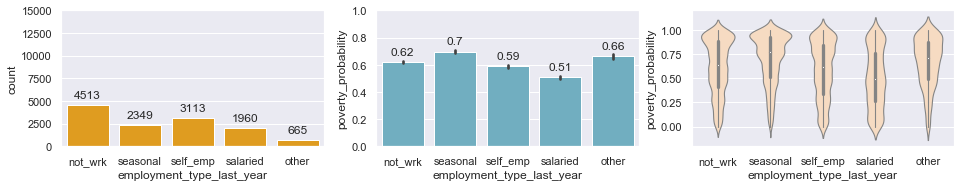

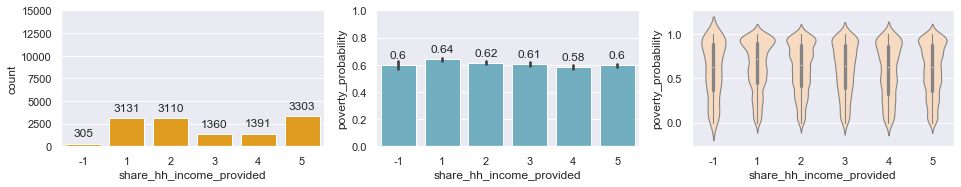

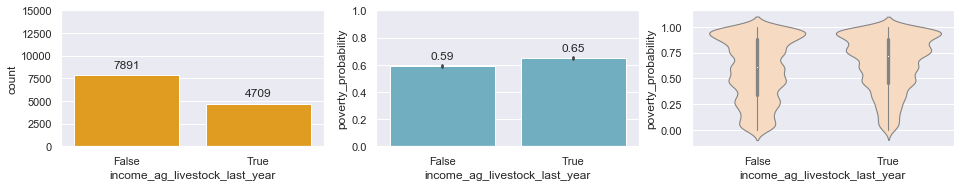

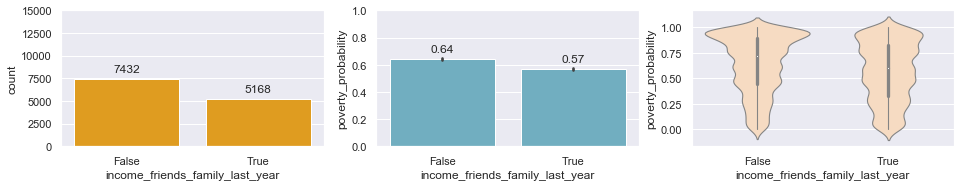

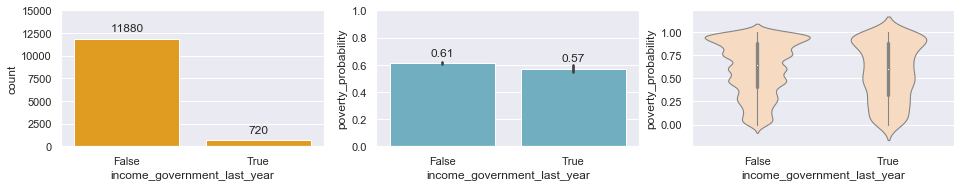

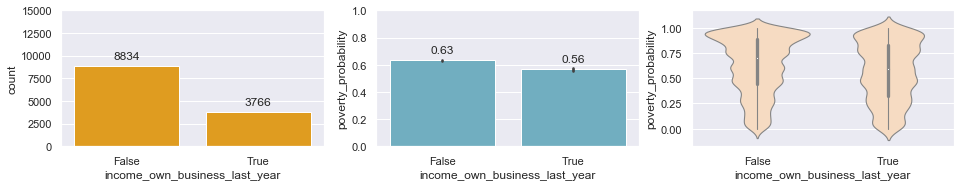

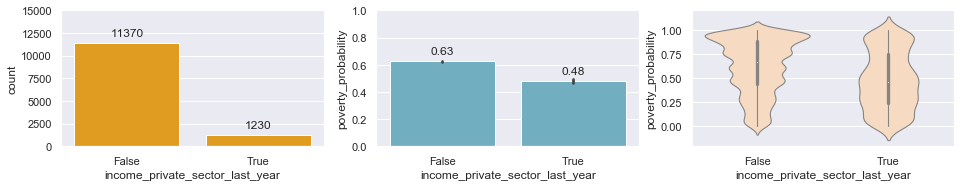

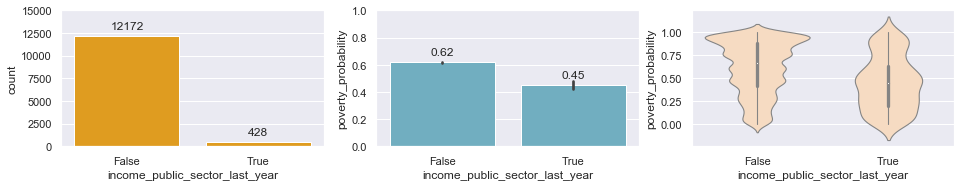

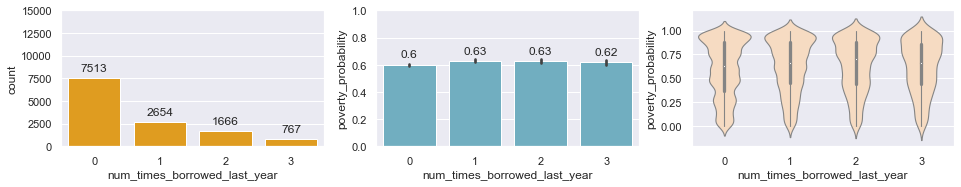

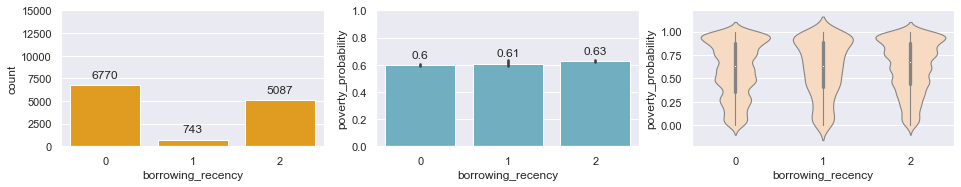

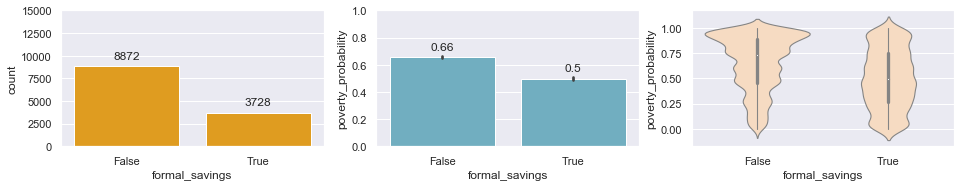

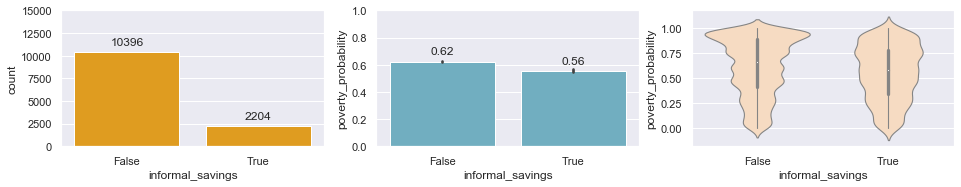

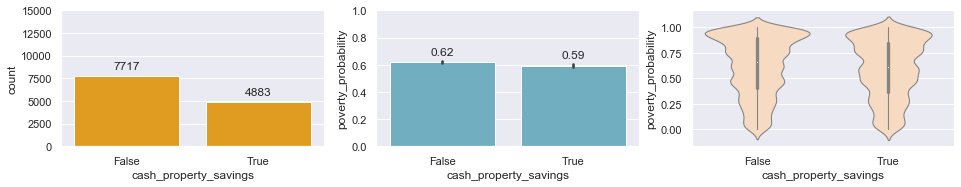

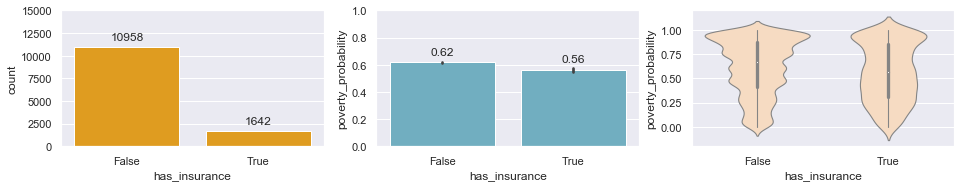

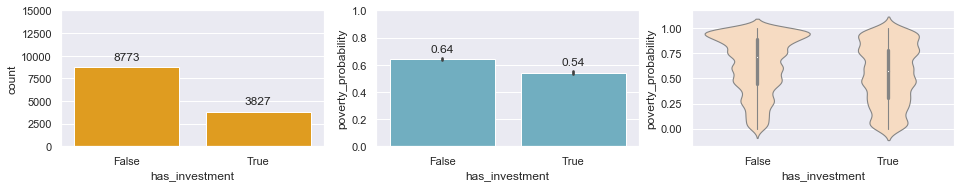

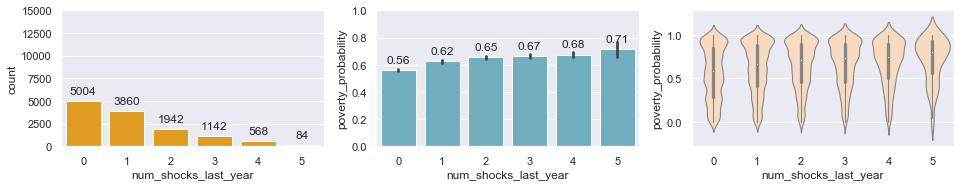

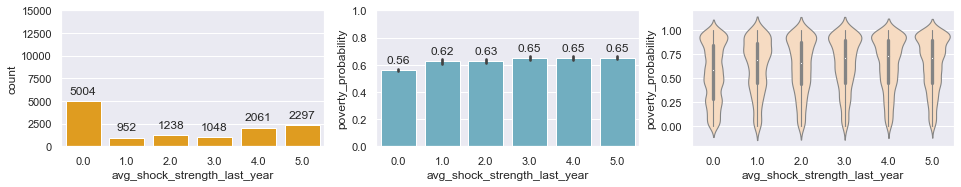

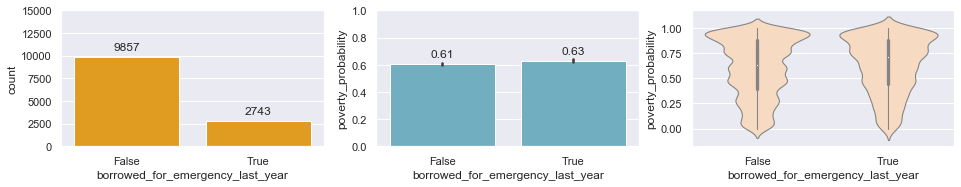

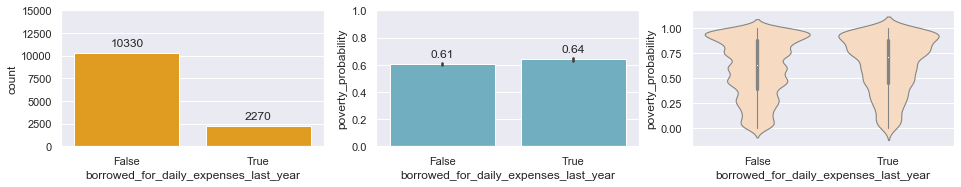

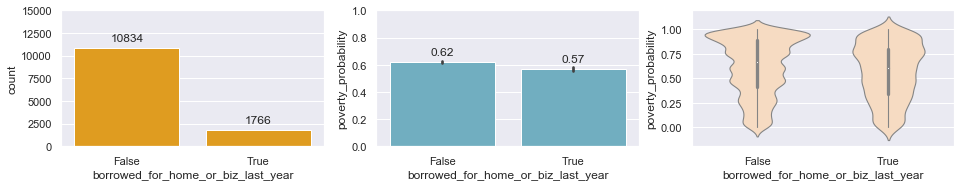

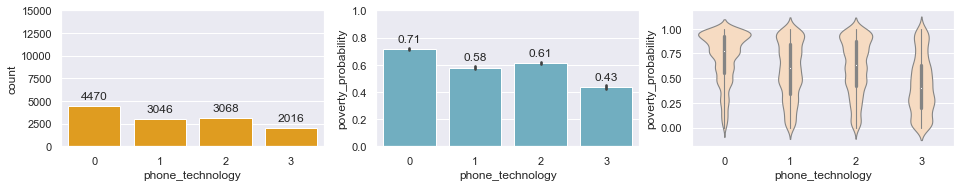

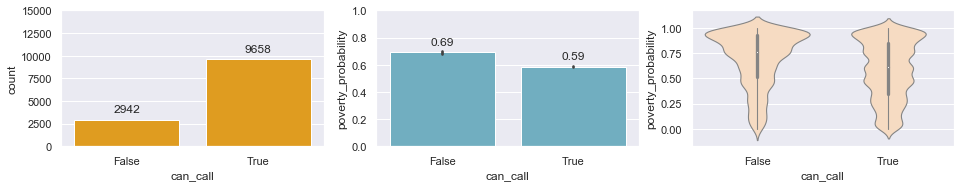

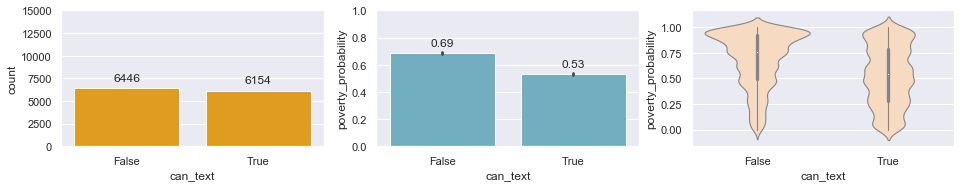

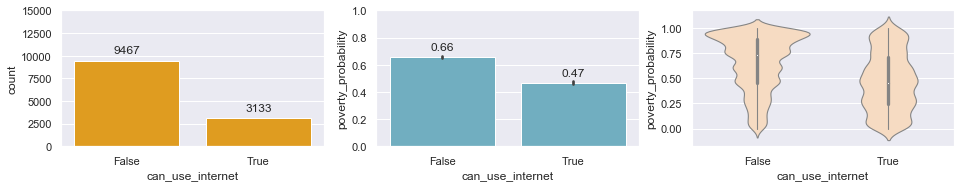

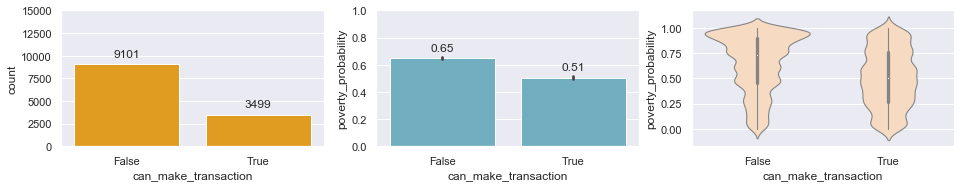

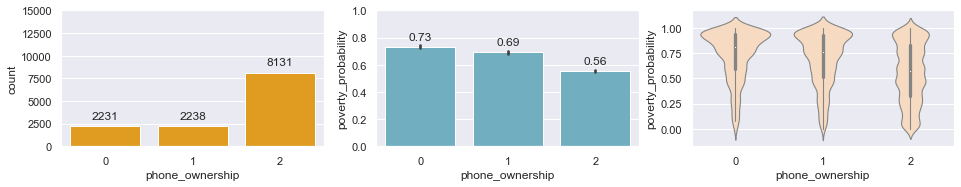

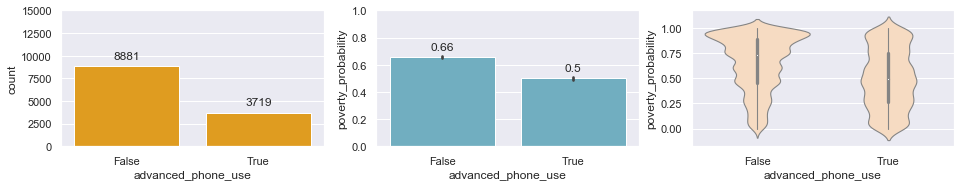

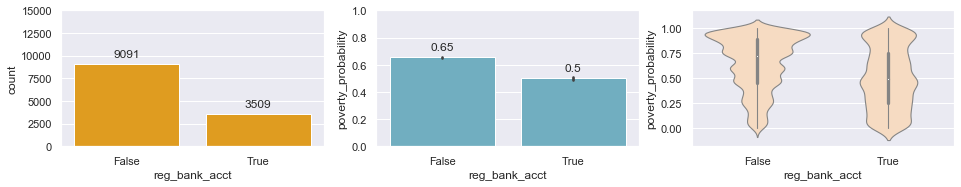

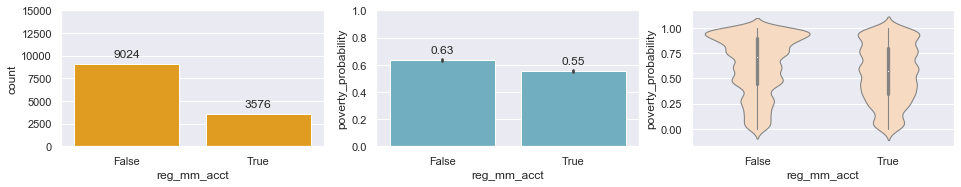

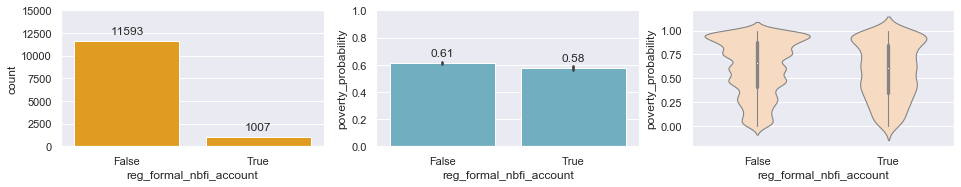

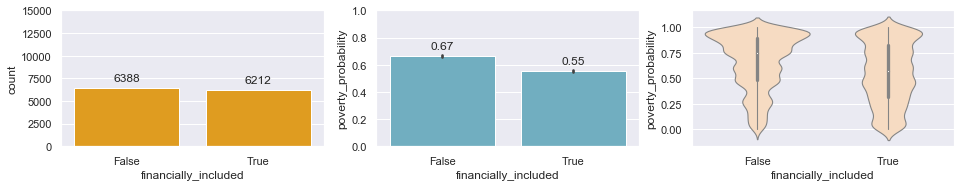

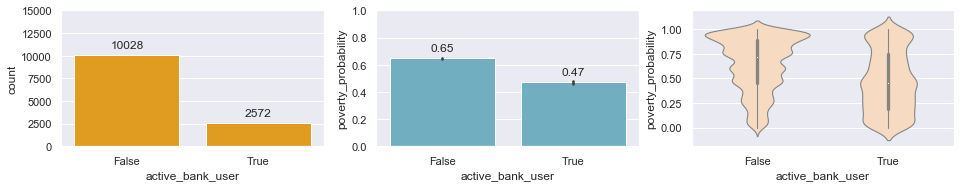

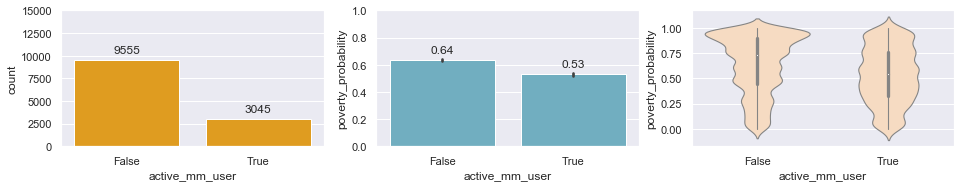

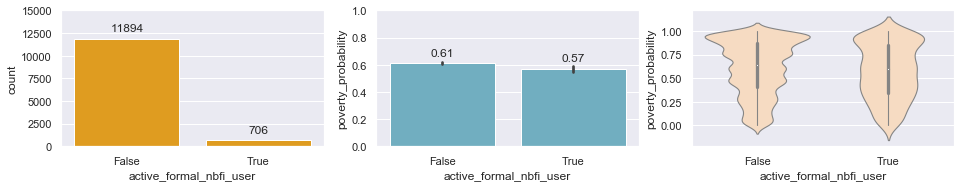

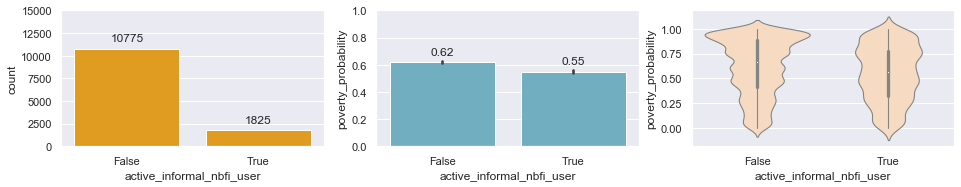

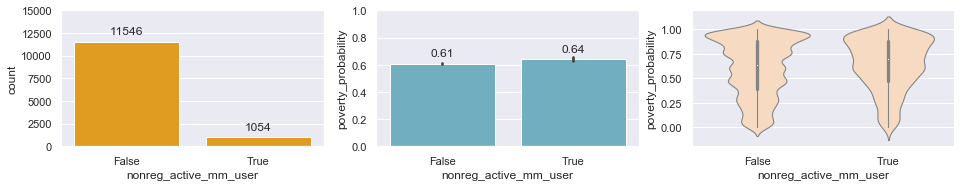

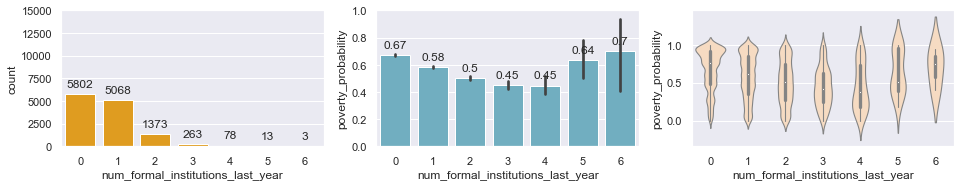

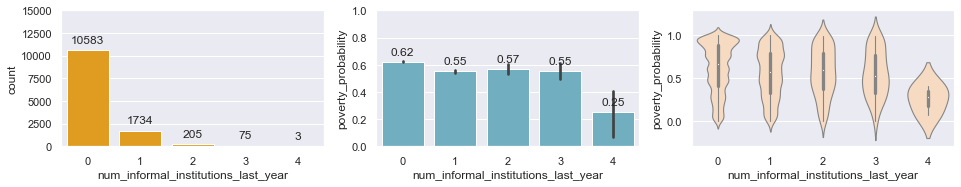

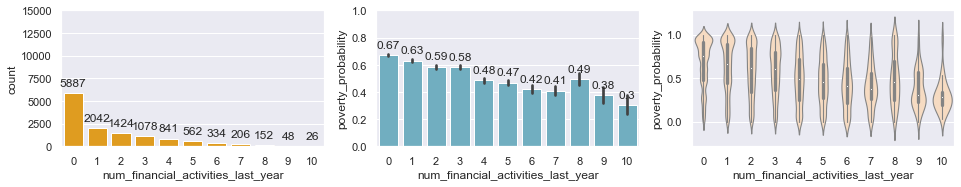

In [14]:
def add_value_labels(ax, spacing, dec_place):
    """Add labels to the end of each bar in a bar chart.
            ax (matplotlib.axes.Axes): The matplotlib object containing the axes of the plot to annotate.
            spacing (int): The distance between the labels and the bars.
            dec_place (int): number of decimal places to show
    """
    for rect in ax.patches:                              # For each bar: Place a label
        y_value = rect.get_height()                         # Get X and Y placement of label from rect.
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'                                       # Vertical alignment for positive values
        if y_value < 0:                                  # If value of bar is negative: Place label below bar
            space *= -1                                     # Invert space to place label below
            va = 'top'                                      # Vertically align label at top
        label = round(y_value, dec_place)                 # Use Y value as label and format number with one decimal place: "{:.1f}".format(y_value)
        ax.annotate(                                     # Create annotation
            label,                                          # Use `label` as label
            (x_value, y_value),                             # Place label at end of the bar
            xytext=(0, space),                              # Vertically shift label by `space`
            textcoords="offset points",                     # Interpret `xytext` as offset in points
            ha='center',                                    # Horizontally center label
            va=va)                                          # Vertically align label differently for positive and negative values.

sns.set(style="darkgrid")
        
feat_to_plot = frame.drop(columns=['age']).columns[1:-1]
for feat in feat_to_plot :
    plt.figure(figsize=(16,2.5))
    plt.subplot(1, 3, 1)
    axcountplot = sns.countplot(x=feat, data=frame, color='orange')
    axcountplot.set_ylim(0, 15000)
    add_value_labels(axcountplot, 5, 0)
    plt.subplot(1, 3, 2)
    axbarplot = sns.barplot(x=feat, y='poverty_probability', data=frame, color='c')
    axbarplot.set_ylim(0, 1)
    add_value_labels(axbarplot, 5, 2)
    plt.subplot(1, 3, 3)
    sns.violinplot(x=feat, y='poverty_probability', data=frame, color='peachpuff', linewidth=1.1)
    plt.show()